In [8]:
%run C:\Users\s162605\Documents\Studie\JAAR3\BEP\sterren\Lissa.ipynb

# dit stuk is uit IFERC_ALL
def nucleus(E, t, diag=False):
    # Peak detection
    maxtab, mintab = peakdet(E, 0.001, x=t)
    
    # A fitting to the peak values to get the decay coefficient:
    result = gmodel.fit(E[:150], t=t[:150], decay=10, nan_policy='propagate')

    # Can you guess the residual?
    if 0.95 <= np.abs(E[-1]/mintab[0, 1]) <= 1.02:
        print('residual? :' + str(mintab[0, 1]))
        
    # Maxpeaks
    a = maxtab[0, :]  # Initial point
    
    if np.shape(maxtab) != (2, 2):  # If there are more points than a and i:
        b1 = maxtab[1, :]  # Second Peak
        i = maxtab[2, :]            
    elif np.shape(maxtab) == (2, 2):
        i = maxtab[1, :]
        b1 = i
        print('i point is the first one')     
    
    # Minpeaks
    b2 = mintab[0, :]  # (Technically) The lowest point
       
    min_index, min_value = min(enumerate(mintab[:, 1]), key=operator.itemgetter(1))  
    f = mintab[min_index, :]  # This determines the minimum peak
    
    if np.shape(mintab) != (1, 2):
        e = mintab[1, :]
    else:
        e = f

    # The initial bump is not detected if the points e & i are both > 0.32
    if b1[0] > 60:
        i = b1
        if i[1] < 0:
            i = maxtab[2, :]
        e = b2
        b1, b2, BR = np.nan, np.nan, np.nan
        GR1, GR2, PE2 = np.nan, np.nan, np.nan
    else:
        BR = np.abs(b2[1] / a[1])                      # Bump ratio
        GR1 = np.abs((e[1]-a[1]) / (b2[1]-a[1]))       # Bump growth ratio
        GR2 = np.abs(e[1] / b2[1])                     # Growth ratio
        PE2 = np.abs(e[0] - b2[0])                     # Bump period

    if isinstance(b2, float) and np.shape(mintab) != (1, 2):  # if b2 does not exist and mintab has more than 1 point
        o = mintab[1, :]
        if o[0] < i[0]:
            o = mintab[2, :]
        DR = np.abs(o[1] / e[1])                       # Decay ratio
        PE = np.abs(o[0] - e[0])                       # Decay period
    elif isinstance(b2, float) == False and np.shape(mintab)[0] >=3:  # if b2 exists and the shape of mintab is >=3
        o = mintab[2, :]
        DR = np.abs(o[1] / e[1])  # Decay ratio
        PE = np.abs(o[0] - e[0])  # Decay period
    else:
        o = np.nan
        DR = np.nan  # Decay ratio
        PE = np.nan  # Decay period

    TP = e[0]                                          # Peak time
    OS = np.abs(e[1] / a[1])                           # Overshoot ratio
                      
    if diag == True:
        print('Diag mode on')
        
        return maxtab, mintab, OS, BR, GR1, GR2, DR, PE, PE2, TP, a, b1, b2, e, i, o
    else:

        return result, OS, DR, TP

loading successful!


In [3]:
data1 = pylab.loadtxt('C:/Users/s162605/Documents/Studie/JAAR3/BEP/sterren/IFERC/W7Xhis05/GAM/104.719/gamdiagions_act.dat')
E1 = (data1[:,1]*(1/data1[0, 1]))
e1 = (data1[:,2]*(1/data1[0, 1]))
t1 = data1[:,0]

data2 = pylab.loadtxt('C:/Users/s162605/Documents/Studie/JAAR3/BEP/sterren/IFERC/W7Xhis05/GAM/665.979/gamdiagions_act.dat')
E2 = (data2[:,1]*(1/data2[0, 1]))
e2 = (data2[:,2]*(1/data2[0, 1]))
t2 = data2[:,0]

data3 = pylab.loadtxt('C:/Users/s162605/Documents/Studie/JAAR3/BEP/sterren/IFERC/W7Xhms05/GAM/104.719/gamdiagions_act.dat')
E3 = (data3[:,1]*(1/data3[0, 1]))
e3 = (data3[:,2]*(1/data3[0, 1]))
t3 = data3[:,0]

data4 = pylab.loadtxt('C:/Users/s162605/Documents/Studie/JAAR3/BEP/sterren/IFERC/W7Xhms05/GAM/621.914/gamdiagions_act.dat')
E4 = (data4[:,1]*(1/data4[0, 1]))
e4 = (data4[:,2]*(1/data4[0, 1]))
t4 = data4[:,0]

data5 = pylab.loadtxt('C:/Users/s162605/Documents/Studie/JAAR3/BEP/sterren/IFERC/W7Xlis05/GAM/104.719/gamdiagions_act.dat')
E5 = (data5[:,1]*(1/data5[0, 1]))
e5 = (data5[:,2]*(1/data5[0, 1]))
t5 = data5[:,0]

data6 = pylab.loadtxt('C:/Users/s162605/Documents/Studie/JAAR3/BEP/sterren/IFERC/W7Xlis05/GAM/340.925/gamdiagions_act.dat')
E6 = (data6[:,1]*(1/data6[0, 1]))
e6 = (data6[:,2]*(1/data6[0, 1]))
t6 = data6[:,0]

data7 = pylab.loadtxt('C:/Users/s162605/Documents/Studie/JAAR3/BEP/sterren/IFERC/W7Xsds025/GAM/104.719/gamdiagions_act.dat')
E7 = (data7[:,1]*(1/data7[0, 1]))
e7 = (data7[:,2]*(1/data7[0, 1]))
t7 = data7[:,0]

data8 = pylab.loadtxt('C:/Users/s162605/Documents/Studie/JAAR3/BEP/sterren/IFERC/W7Xsds025/GAM/774.957/gamdiagions_act.dat')
E8 = (data8[:,1]*(1/data8[0, 1]))
e8 = (data8[:,2]*(1/data8[0, 1]))
t8 = data8[:,0]

data9 = pylab.loadtxt('C:/Users/s162605/Documents/Studie/JAAR3/BEP/sterren/IFERC/W7Xsds036/GAM/436.87/gamdiagions_act.dat')
E9 = (data9[:,1]*(1/data9[0, 1]))
e9 = (data9[:,2]*(1/data9[0, 1]))
t9 = data9[:,0]

#####onderstaande data (10) en (11) is niet van sds05 maar van hms05####
#data10 = pylab.loadtxt('C:/Users/s162605/Documents/Studie/JAAR3/BEP/sterren/IFERC/W7Xsds05/GAM/104.719/gamdiagions_act.dat')
#E10 = (data10[:,1]*(1/data10[0, 1]))
#e10 = (data10[:,2]*(1/data10[0, 1]))
#t10 = data10[:,0]
#
#data11 = pylab.loadtxt('C:/Users/s162605/Documents/Studie/JAAR3/BEP/sterren/IFERC/W7Xsds05/GAM/621.914/gamdiagions_act.dat')
#E11 = (data11[:,1]*(1/data11[0, 1]))
#e11 = (data11[:,2]*(1/data11[0, 1]))
#t11 = data11[:,0]

data12 = pylab.loadtxt('C:/Users/s162605/Documents/Studie/JAAR3/BEP/sterren/IFERC/W7Xsds06/GAM/104.719/gamdiagions_act.dat')
E12 = (data12[:,1]*(1/data12[0, 1]))
e12 = (data12[:,2]*(1/data12[0, 1]))
t12 = data12[:,0]

data13 = pylab.loadtxt('C:/Users/s162605/Documents/Studie/JAAR3/BEP/sterren/IFERC/W7Xsds06/GAM/198.992/gamdiagions_act.dat')
E13 = (data13[:,1]*(1/data13[0, 1]))
e13 = (data13[:,2]*(1/data13[0, 1]))
t13 = data13[:,0]

data14 = pylab.loadtxt('C:/Users/s162605/Documents/Studie/JAAR3/BEP/sterren/IFERC/W7Xsds09/GAM/59.952/gamdiagions_act.dat')
E14 = (data14[:,1]*(1/data14[0, 1]))
e14 = (data14[:,2]*(1/data14[0, 1]))
t14 = data14[:,0]

Integral over Q for W7Xhis05 104.719 is: 142.0649780167435
Integral over Q for W7Xhis05 665.979 is: 132.06054073417238
Integral over Q for W7Xhms05 104.719 is: 141.7742715400966
Integral over Q for W7Xhms05 621.914 is: 60.6164959424759
Integral over Q for W7Xlis05 104.719 is: 73.1856609209236
Integral over Q for W7Xlis05 340.925 is: 47.948404062152576
Integral over Q for W7Xsds025 104.719 is: 87.27935188452179
Integral over Q for W7Xsds025 774.957 is: 33.61708703477794
Integral over Q for W7Xsds036 436.87 is: 56.09591850182229
Integral over Q for W7Xsds06 104.719 is: 110.01222480385765
Integral over Q for W7Xsds06 198.992 is: 96.99308112866956
Integral over Q for W7Xsds09 59.952 is: 189.19881632225474


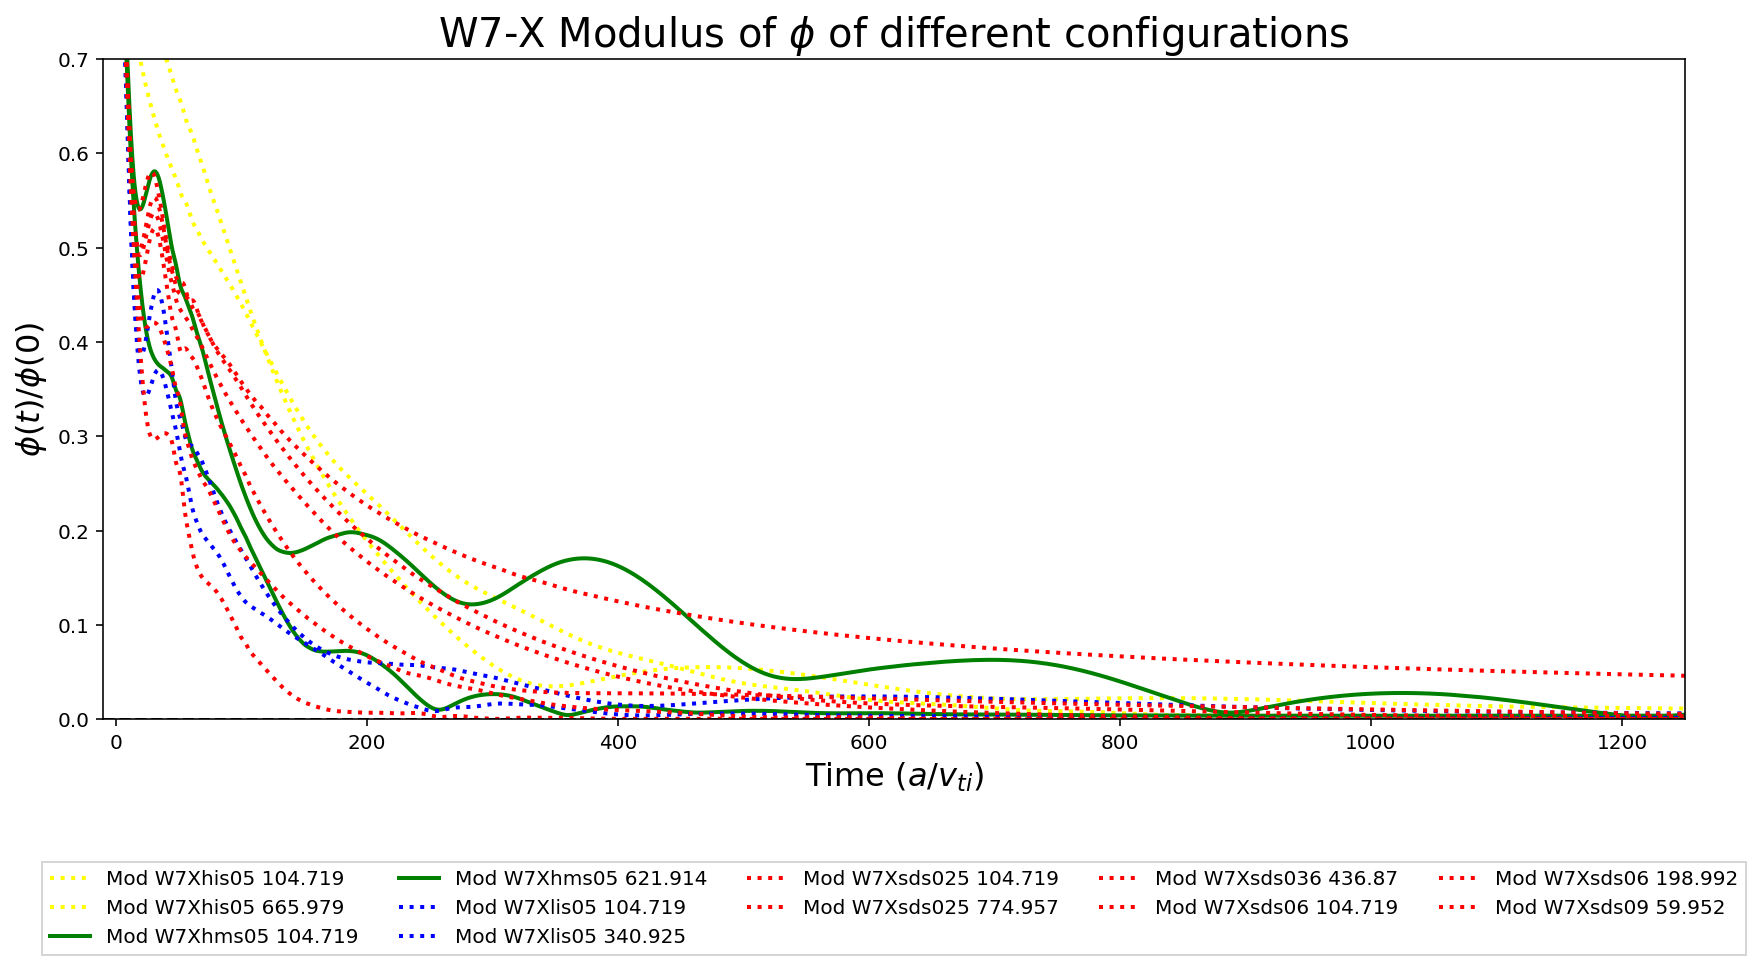

In [24]:
#ALL MODULUS
fig, ax1 = plt.subplots(figsize=(13, 7))
plt.title('W7-X Modulus of $\phi$ of different configurations', fontsize=20)
ax1.set_xlabel('Time ($a / v_{ti}$)',fontsize=16)
ax1.set_ylabel('$\phi (t) / \phi (0)$',fontsize=16)
ax1.axhline(y=0, color='black', linestyle='dashed')
plt.ylim([0,0.7])
plt.xlim([-10,1250])

Q1 = np.sqrt(E1**2+e1**2)
ax1.plot(t1, Q1, linewidth=2, label=('Mod W7Xhis05 104.719'),color='yellow',linestyle='dotted')

Q2 = np.sqrt(E2**2+e2**2)
ax1.plot(t2, Q2, linewidth=2, label=('Mod W7Xhis05 665.979'),color='yellow',linestyle='dotted')

Q3 = np.sqrt(E3**2+e3**2)
ax1.plot(t3, Q3, linewidth=2, label=('Mod W7Xhms05 104.719'),color='green')

Q4 = np.sqrt(E4**2+e4**2)
ax1.plot(t4, Q4, linewidth=2, label=('Mod W7Xhms05 621.914'),color='green')

Q5 = np.sqrt(E5**2+e5**2)
ax1.plot(t5, Q5, linewidth=2, label=('Mod W7Xlis05 104.719'),color='blue',linestyle='dotted')

Q6 = np.sqrt(E6**2+e6**2)
ax1.plot(t6, Q6, linewidth=2, label=('Mod W7Xlis05 340.925'),color='blue',linestyle='dotted')

Q7 = np.sqrt(E7**2+e7**2)
ax1.plot(t7, Q7, linewidth=2, label=('Mod W7Xsds025 104.719'),color='red',linestyle='dotted')

Q8 = np.sqrt(E8**2+e8**2)
ax1.plot(t8, Q8, linewidth=2, label=('Mod W7Xsds025 774.957'),color='red',linestyle='dotted')

Q9 = np.sqrt(E9**2+e9**2)
ax1.plot(t9, Q9, linewidth=2, label=('Mod W7Xsds036 436.87'),color='red',linestyle='dotted')

#####onderstaande data (10) en (11) is niet van sds05 maar van hms05####
#Q10 = np.sqrt(E10**2+e10**2)
#ax1.plot(t10, Q10, linewidth=2, label=('Mod W7Xsds05 104.719'),color='red',linestyle='dotted')
#
#Q11 = np.sqrt(E11**2+e11**2)
#ax1.plot(t11, Q11, linewidth=2, label=('Mod W7Xsds05 621.914'),color='red',linestyle='dotted')

Q12 = np.sqrt(E12**2+e12**2)
ax1.plot(t12, Q12, linewidth=2, label=('Mod W7Xsds06 104.719'),color='red',linestyle='dotted')

Q13 = np.sqrt(E13**2+e13**2)
ax1.plot(t13, Q13, linewidth=2, label=('Mod W7Xsds06 198.992'),color='red',linestyle='dotted')

Q14 = np.sqrt(E14**2+e14**2)
ax1.plot(t14, Q14, linewidth=2, label=('Mod W7Xsds09 59.952'),color='red',linestyle='dotted')

plt.legend(loc='upper center', 
             bbox_to_anchor=(0.5, -0.2),fancybox=False, shadow=False, ncol=5)

fig.tight_layout()
#plt.savefig('../../CMSS_2018/Poster/Salpha_nlzf_plot.pdf', format='pdf', dpi=1200)    

integ11 = (np.trapz(Q1,t1))
integ21 = (np.trapz(Q2,t2))
integ31 = (np.trapz(Q3,t3))
integ41 = (np.trapz(Q4,t4))
integ51 = (np.trapz(Q5,t5))
integ61 = (np.trapz(Q6,t6))
integ71 = (np.trapz(Q7,t7))
integ81 = (np.trapz(Q8,t8))
integ91 = (np.trapz(Q9,t9))
#####onderstaande data (10) en (11) is niet van sds05 maar van hms05####
#integ101 = (np.trapz(Q10,t10))
#integ111 = (np.trapz(Q11,t11))
integ121 = (np.trapz(Q12,t12))
integ131 = (np.trapz(Q13,t13))
integ141 = (np.trapz(Q14,t14))

print("Integral over Q for W7Xhis05 104.719 is:", integ11)
print("Integral over Q for W7Xhis05 665.979 is:", integ21)
print("Integral over Q for W7Xhms05 104.719 is:", integ31)
print("Integral over Q for W7Xhms05 621.914 is:", integ41)
print("Integral over Q for W7Xlis05 104.719 is:", integ51)
print("Integral over Q for W7Xlis05 340.925 is:", integ61)
print("Integral over Q for W7Xsds025 104.719 is:", integ71)
print("Integral over Q for W7Xsds025 774.957 is:", integ81)
print("Integral over Q for W7Xsds036 436.87 is:", integ91)
#####onderstaande data (10) en (11) is niet van sds05 maar van hms05####
#print("Integral over Q for W7Xsds05 104.719 is:", integ101)
#print("Integral over Q for W7Xsds05 621.914 is:", integ111)
print("Integral over Q for W7Xsds06 104.719 is:", integ121)
print("Integral over Q for W7Xsds06 198.992 is:", integ131)
print("Integral over Q for W7Xsds09 59.952 is:", integ141)

Integral over E for W7Xhis05 104.719 is: 38.590698235110544
Integral over E for W7Xhis05 665.979 is: 3.799397884568087
Integral over E for W7Xhms05 104.719 is: 26.775229431296808
Integral over E for W7Xhms05 621.914 is: 4.921177945986169
Integral over E for W7Xlis05 104.719 is: 25.932156946370327
Integral over E for W7Xlis05 340.925 is: 7.242282554870965
Integral over E for W7Xsds025 104.719 is: 33.239786133409225
Integral over E for W7Xsds025 774.957 is: 2.4870973327282018
Integral over E for W7Xsds036 436.87 is: 3.852529501732998
Integral over E for W7Xsds06 104.719 is: 26.85027851554963
Integral over E for W7Xsds06 198.992 is: 11.090532289827145
Integral over E for W7Xsds09 59.952 is: 173.16268223775663


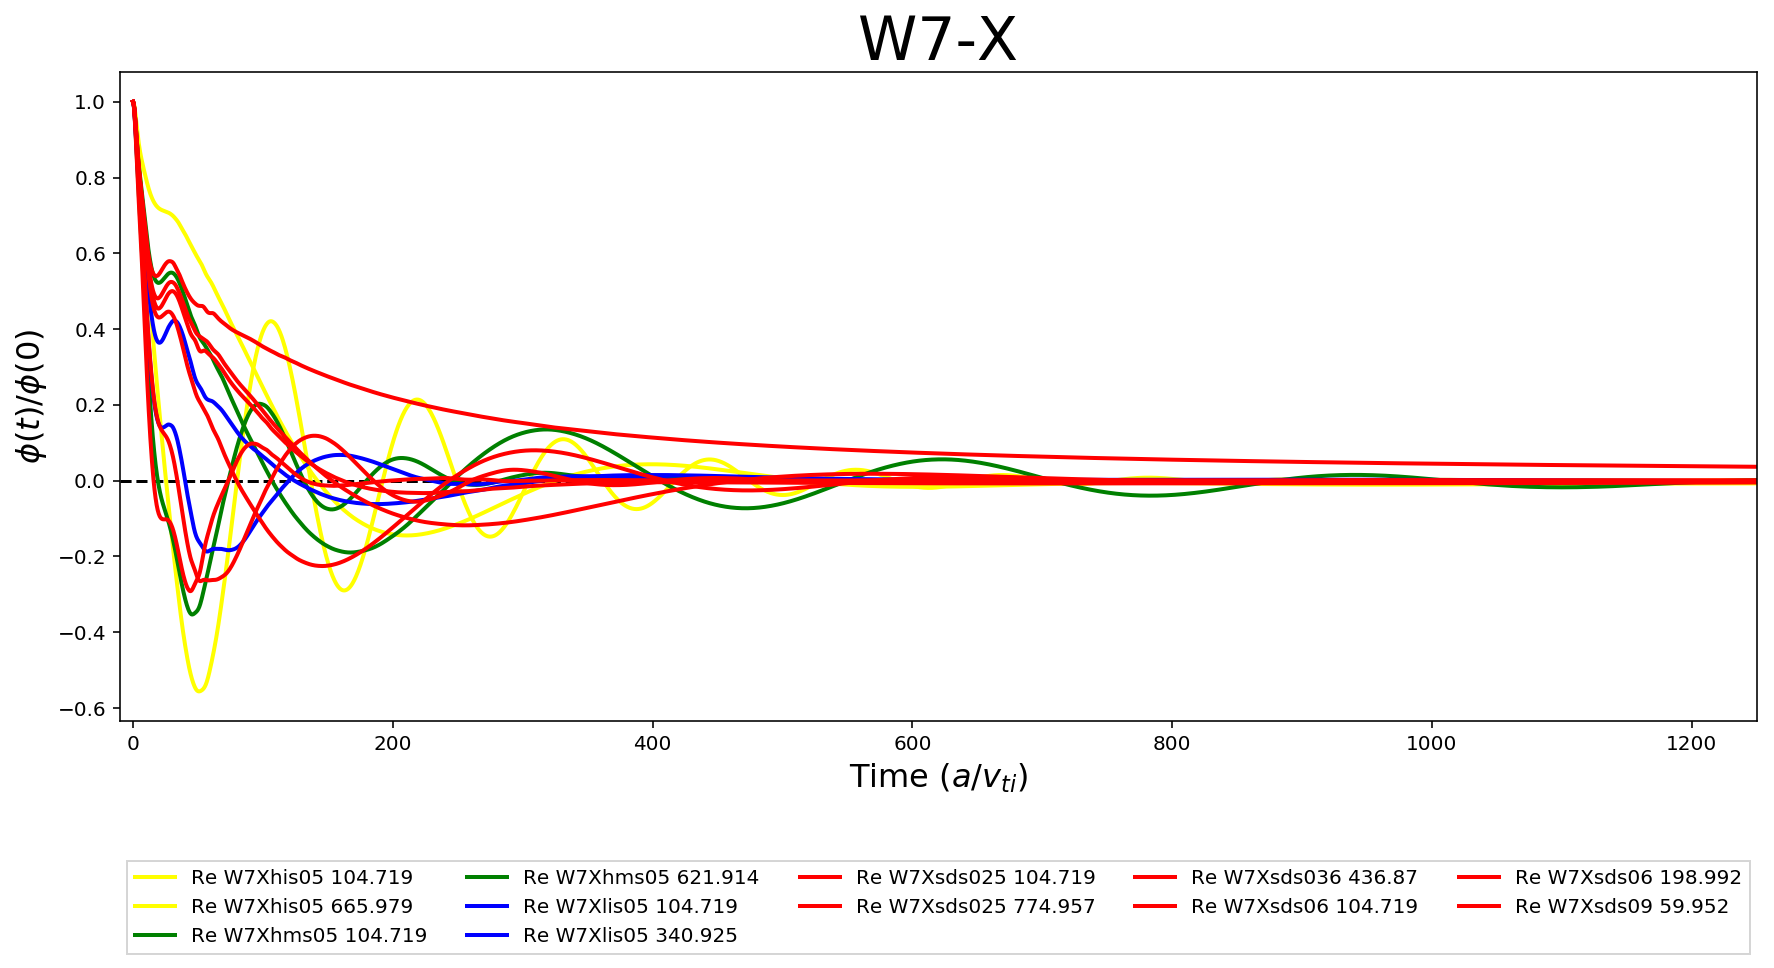

In [21]:
#ALL REAL PART
fig, ax1 = plt.subplots(figsize=(13, 7))
plt.title('W7-X', fontsize=30)
ax1.set_xlabel('Time ($a / v_{ti}$)',fontsize=16)
ax1.set_ylabel('$\phi (t) / \phi (0)$',fontsize=16)
ax1.axhline(y=0, color='black', linestyle='dashed')
#plt.ylim([0,0.1])
plt.xlim([-10,1250])

ax1.plot(t1, E1, linewidth=2, label=('Re W7Xhis05 104.719'),color='yellow')
ax1.plot(t2, E2, linewidth=2, label=('Re W7Xhis05 665.979'),color='yellow')
ax1.plot(t3, E3, linewidth=2, label=('Re W7Xhms05 104.719'),color='green')
ax1.plot(t4, E4, linewidth=2, label=('Re W7Xhms05 621.914'),color='green')
ax1.plot(t5, E5, linewidth=2, label=('Re W7Xlis05 104.719'),color='blue')
ax1.plot(t6, E6, linewidth=2, label=('Re W7Xlis05 340.925'),color='blue')
ax1.plot(t7, E7, linewidth=2, label=('Re W7Xsds025 104.719'),color='red')
ax1.plot(t8, E8, linewidth=2, label=('Re W7Xsds025 774.957'),color='red')
ax1.plot(t9, E9, linewidth=2, label=('Re W7Xsds036 436.87'),color='red')
#####onderstaande data (10) en (11) is niet van sds05 maar van hms05####
#ax1.plot(t10, E10, linewidth=2, label=('Re W7Xsds05 104.719'),color='red')
#ax1.plot(t11, E11, linewidth=2, label=('Re W7Xsds05 621.914'),color='red')
ax1.plot(t12, E12, linewidth=2, label=('Re W7Xsds06 104.719'),color='red')
ax1.plot(t13, E13, linewidth=2, label=('Re W7Xsds06 198.992'),color='red')
ax1.plot(t14, E14, linewidth=2, label=('Re W7Xsds09 59.952'),color='red')

plt.legend(loc='upper center', 
             bbox_to_anchor=(0.5, -0.2),fancybox=False, shadow=False, ncol=5)

fig.tight_layout()
#plt.savefig('../../CMSS_2018/Poster/Salpha_nlzf_plot.pdf', format='pdf', dpi=1200)    

integ12 = (np.trapz(E1,t1))
integ22 = (np.trapz(E2,t2))
integ32 = (np.trapz(E3,t3))
integ42 = (np.trapz(E4,t4))
integ52 = (np.trapz(E5,t5))
integ62 = (np.trapz(E6,t6))
integ72 = (np.trapz(E7,t7))
integ82 = (np.trapz(E8,t8))
integ92 = (np.trapz(E9,t9))
#####onderstaande data (10) en (11) is niet van sds05 maar van hms05####
#integ102 = (np.trapz(E10,t10))
#integ112 = (np.trapz(E11,t11))
integ122 = (np.trapz(E12,t12))
integ132 = (np.trapz(E13,t13))
integ142 = (np.trapz(E14,t14))

print("Integral over E for W7Xhis05 104.719 is:", integ12)
print("Integral over E for W7Xhis05 665.979 is:", integ22)
print("Integral over E for W7Xhms05 104.719 is:", integ32)
print("Integral over E for W7Xhms05 621.914 is:", integ42)
print("Integral over E for W7Xlis05 104.719 is:", integ52)
print("Integral over E for W7Xlis05 340.925 is:", integ62)
print("Integral over E for W7Xsds025 104.719 is:", integ72)
print("Integral over E for W7Xsds025 774.957 is:", integ82)
print("Integral over E for W7Xsds036 436.87 is:", integ92)
#####onderstaande data (10) en (11) is niet van sds05 maar van hms05####
#print("Integral over E for W7Xsds05 104.719 is:", integ102)
#print("Integral over E for W7Xsds05 621.914 is:", integ112)
print("Integral over E for W7Xsds06 104.719 is:", integ122)
print("Integral over E for W7Xsds06 198.992 is:", integ132)
print("Integral over E for W7Xsds09 59.952 is:", integ142)

Integral over e for W7Xhis05 104.719 is: -78.3049746921596
Integral over e for W7Xhis05 665.979 is: -13.630978491017826
Integral over e for W7Xhms05 104.719 is: 45.38298032766693
Integral over e for W7Xhms05 621.914 is: 7.780063565136814
Integral over e for W7Xlis05 104.719 is: -34.58589536468567
Integral over e for W7Xlis05 340.925 is: -12.5973596293844
Integral over e for W7Xsds025 104.719 is: 54.152667637209525
Integral over e for W7Xsds025 774.957 is: 9.514136664886745
Integral over e for W7Xsds036 436.87 is: 13.508192003120374
Integral over e for W7Xsds06 104.719 is: 52.086047950510284
Integral over e for W7Xsds06 198.992 is: 30.34704801608625
Integral over e for W7Xsds09 59.952 is: 63.08965346484254


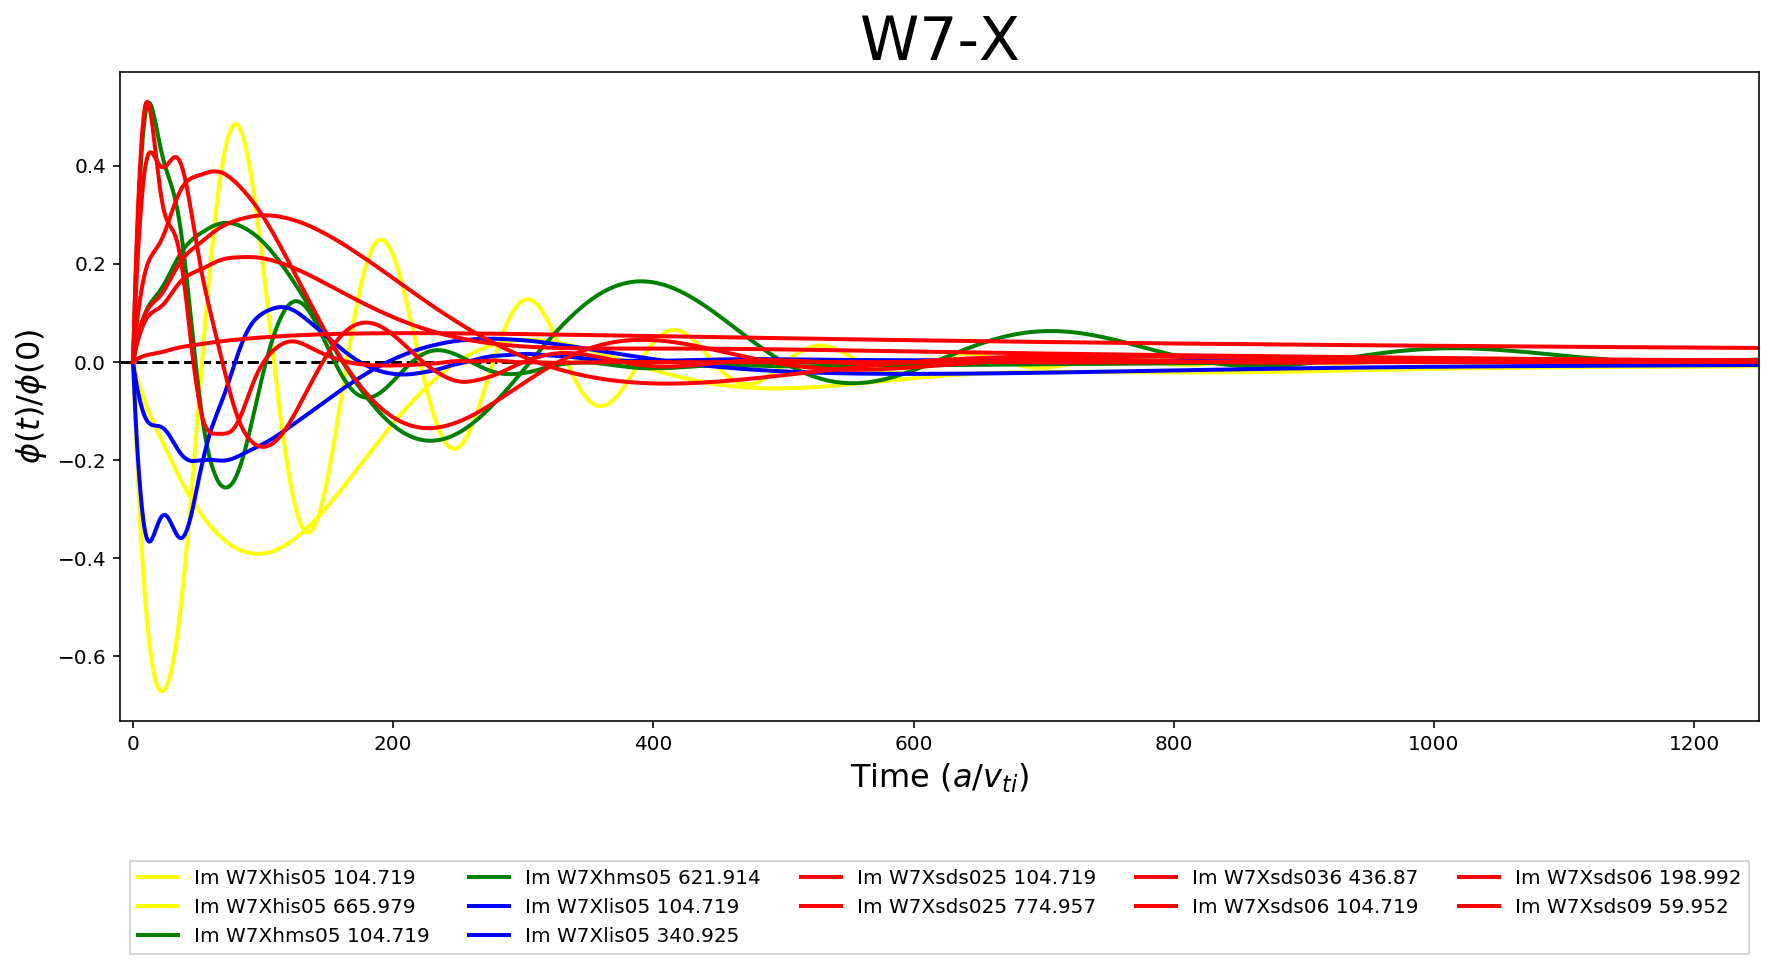

In [20]:
#ALL IMAGINAIR PART
fig, ax1 = plt.subplots(figsize=(13, 7))
plt.title('W7-X', fontsize=30)
ax1.set_xlabel('Time ($a / v_{ti}$)',fontsize=16)
ax1.set_ylabel('$\phi (t) / \phi (0)$',fontsize=16)
ax1.axhline(y=0, color='black', linestyle='dashed')
#plt.ylim([0,0.1])
plt.xlim([-10,1250])

ax1.plot(t1, e1, linewidth=2, label=('Im W7Xhis05 104.719'),color='yellow')
ax1.plot(t2, e2, linewidth=2, label=('Im W7Xhis05 665.979'),color='yellow')
ax1.plot(t3, e3, linewidth=2, label=('Im W7Xhms05 104.719'),color='green')
ax1.plot(t4, e4, linewidth=2, label=('Im W7Xhms05 621.914'),color='green')
ax1.plot(t5, e5, linewidth=2, label=('Im W7Xlis05 104.719'),color='blue')
ax1.plot(t6, e6, linewidth=2, label=('Im W7Xlis05 340.925'),color='blue')
ax1.plot(t7, e7, linewidth=2, label=('Im W7Xsds025 104.719'),color='red')
ax1.plot(t8, e8, linewidth=2, label=('Im W7Xsds025 774.957'),color='red')
ax1.plot(t9, e9, linewidth=2, label=('Im W7Xsds036 436.87'),color='red')
#####onderstaande data (10) en (11) is niet van sds05 maar van hms05####
#ax1.plot(t10, e10, linewidth=2, label=('Im W7Xsds05 104.719'),color='red')
#ax1.plot(t11, e11, linewidth=2, label=('Im W7Xsds05 621.914'),color='red')
ax1.plot(t12, e12, linewidth=2, label=('Im W7Xsds06 104.719'),color='red')
ax1.plot(t13, e13, linewidth=2, label=('Im W7Xsds06 198.992'),color='red')
ax1.plot(t14, e14, linewidth=2, label=('Im W7Xsds09 59.952'),color='red')

plt.legend(loc='upper center', 
             bbox_to_anchor=(0.5, -0.2),fancybox=False, shadow=False, ncol=5)

fig.tight_layout()
#plt.savefig('../../CMSS_2018/Poster/Salpha_nlzf_plot.pdf', format='pdf', dpi=1200)    

integ11 = (np.trapz(Q1,t1))
integ12 = (np.trapz(E1,t1))
integ13 = (np.trapz(e1,t1))
integ21 = (np.trapz(Q2,t2))
integ22 = (np.trapz(E2,t2))
integ23 = (np.trapz(e2,t2))
integ31 = (np.trapz(Q3,t3))
integ32 = (np.trapz(E3,t3))
integ33 = (np.trapz(e3,t3))
integ41 = (np.trapz(Q4,t4))
integ42 = (np.trapz(E4,t4))
integ43 = (np.trapz(e4,t4))
integ51 = (np.trapz(Q5,t5))
integ52 = (np.trapz(E5,t5))
integ53 = (np.trapz(e5,t5))
integ61 = (np.trapz(Q6,t6))
integ62 = (np.trapz(E6,t6))
integ63 = (np.trapz(e6,t6))
integ71 = (np.trapz(Q7,t7))
integ72 = (np.trapz(E7,t7))
integ73 = (np.trapz(e7,t7))
integ81 = (np.trapz(Q8,t8))
integ82 = (np.trapz(E8,t8))
integ83 = (np.trapz(e8,t8))
integ91 = (np.trapz(Q9,t9))
integ92 = (np.trapz(E9,t9))
integ93 = (np.trapz(e9,t9))
#####onderstaande data (10) en (11) is niet van sds05 maar van hms05####
#integ101 = (np.trapz(Q10,t10))
#integ102 = (np.trapz(E10,t10))
#integ103 = (np.trapz(e10,t10))
#integ111 = (np.trapz(Q11,t11))
#integ112 = (np.trapz(E11,t11))
#integ113 = (np.trapz(e11,t11))
integ121 = (np.trapz(Q12,t12))
integ122 = (np.trapz(E12,t12))
integ123 = (np.trapz(e12,t12))
integ131 = (np.trapz(Q13,t13))
integ132 = (np.trapz(E13,t13))
integ133 = (np.trapz(e13,t13))
integ141 = (np.trapz(Q14,t14))
integ142 = (np.trapz(E14,t14))
integ143 = (np.trapz(e14,t14))

print("Integral over e for W7Xhis05 104.719 is:", integ13)
print("Integral over e for W7Xhis05 665.979 is:", integ23)
print("Integral over e for W7Xhms05 104.719 is:", integ33)
print("Integral over e for W7Xhms05 621.914 is:", integ43)
print("Integral over e for W7Xlis05 104.719 is:", integ53)
print("Integral over e for W7Xlis05 340.925 is:", integ63)
print("Integral over e for W7Xsds025 104.719 is:", integ73)
print("Integral over e for W7Xsds025 774.957 is:", integ83)
print("Integral over e for W7Xsds036 436.87 is:", integ93)
#####onderstaande data (10) en (11) is niet van sds05 maar van hms05####
#print("Integral over e for W7Xsds05 104.719 is:", integ103)
#print("Integral over e for W7Xsds05 621.914 is:", integ113)
print("Integral over e for W7Xsds06 104.719 is:", integ123)
print("Integral over e for W7Xsds06 198.992 is:", integ133)
print("Integral over e for W7Xsds09 59.952 is:", integ143)